# TP1 – Maximum de vraisemblance

La figure 1 montre $n$ observations indépendantes que l'on considère comme une réalisation $\left(x_{1}, \ldots, x_{n}\right)$ d'un $n$ -uplet $\left(X_{1}, \ldots, X_{n}\right)$ de variables aléatoires $«$ iid $»$ (indépendantes et identiquement distribuées). La loi des $n$ variables $X_{i}$ est soit $f_{\theta_{1}}(x)$ soit $f_{\theta_{2}}(x),$ de paramètres respectifs $\theta_{1}$ et $\theta_{2},$ qui se déduisent l'une de l'autre par translation. Bien sur, ces données sont plus probablement issues de la densité $f_{\theta_{1}}(x)$ que de la densité $f_{\theta_{2}}(x) .$ Comment formaliser cette intuition ? Par la notion de vraisemblance, généralement notée $L$ (pour likelihood). La vraisemblance $L_{\theta}\left(x_{1}, \ldots, x_{n}\right)$ est la loi du $n$ -uplet $\left(X_{1}, \ldots, X_{n}\right),$ qui dépend de paramètres $\theta$ supposés connus :
$$
L_{\theta}\left(x_{1}, \ldots, x_{n}\right)=\prod_{i=1}^{n} f_{\theta}\left(x_{i}\right)
$$
où $f_{\theta}$ est la densité de probabilité commune à toutes les variables indépendantes $X_{i}$ (que l'on suppose continues). Le but de ce TP est de montrer l'intérêt du maximum de vraisemblance pour l'estimation des paramètres. La loi qui semble le mieux $«$ expliquer $»$ les observations de la figure 1 est celle qui maximise leur vraisemblance $L_{\theta}\left(x_{1}, \ldots, x_{n}\right) .$ On trouve ainsi la valeur $\theta^{*}$ de $\theta$ qui explique le mieux les observations $\left(x_{1}, \ldots, x_{n}\right)$

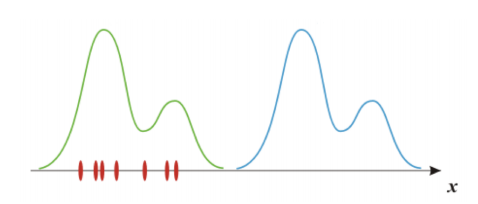

FIGURE $1-$ Les $n$ observations indépendantes (en rouge) d'un $n$ -uplet de variables aléatoires correspondent plus probablement à la densité $f_{\theta_{1}}(x),$ en vert, qu'à la densité $f_{\theta_{2}}(x),$ en bleu, qui est une translatée de $f_{\theta_{1}}(x)$.

## Estimation des paramètres d’un cercle par maximum de vraisemblance

Lancez le script ``donnees``, qui tire aléatoirement le centre $C_{0}$ et le rayon $R_{0}$ d'un cercle, ainsi que $n$ points $P_{i}=\left(x_{i}, y_{i}\right)$ situés au voisinage de ce cercle. On souhaite estimer les paramètres $\left(C_{0}, R_{0}\right)$ à partir des seuls $P_{i}$.

$\operatorname{Si} \epsilon\left(P_{i}\right)=d\left(P_{i}, C_{0}\right)-R_{0}$ désigne l'écart entre le rayon $R_{0}$ et la distance $d\left(P_{i}, C_{0}\right)$ du point $P_{i}$ au centre $C_{0}$ il semble légitime de modéliser ces écarts par une loi normale tronquée d'écart-type $\sigma$ :
$$
f_{\left(C_{0}, R_{0}\right)}\left(P_{i}\right)=\left\{\begin{array}{ll}
K \exp \left\{-\frac{\epsilon\left(P_{i}\right)^{2}}{2 \sigma^{2}}\right\} & \text { si } \epsilon\left(P_{i}\right) \geq-R_{0} \\
0 & \text { sinon }
\end{array}\right.
$$
Les écarts $\epsilon \left(P_{i} \right) $ prenant leurs valeurs dans $\left[ - R_{0} , + \infty \right[$ et non dans $\mathbb{R},$ le coefficient de normalisation $K$ n'est pas exactement égal à $(\sigma \sqrt{2 \pi})^{-1}$. Il est facile de vérifier que $K$ dépend de $R_{0},$ mais pas de $C_{0}$.

In [1]:
%%file donnees.m

clear;
close all;

taille_ecran = get(0,'ScreenSize');
L = taille_ecran(3);
H = taille_ecran(4);

% Fenetre d'affichage :
figure('Name','Donnees situees au voisinage d''un cercle', ...
       'Position',[0.2*L,0.05*H,0.6*L,0.7*H]);
axis equal;
hold on;
set(gca,'FontSize',20);
hx = xlabel('$x$','FontSize',30);
set(hx,'Interpreter','Latex');
hy = ylabel('$y$','FontSize',30);
set(hy,'Interpreter','Latex');

% Bornes d'affichage des donnees centrees en (0,0) :
taille = 20;
bornes = [-taille taille, -taille taille];

% Creation du cercle reel et des donnees bruitees :
n = 50;
sigma = 0.5;
[x_cercle_reel,y_cercle_reel,theta_cercle, ...
	x_donnees_bruitees,y_donnees_bruitees,theta_donnees_bruitees] ...
		= creation_cercle_reel_et_donnees_bruitees(taille,n,sigma);

% Affichage du cercle reel :
plot(x_cercle_reel([1:end 1]),y_cercle_reel([1:end 1]),'r','LineWidth',3);

% Affichage des donnees bruitees :
plot(x_donnees_bruitees,y_donnees_bruitees,'k+','MarkerSize',10,'LineWidth',2);
axis(bornes);
lg = legend('~Cercle reel $(C_0,R_0)$', ...
		'~Donnees bruitees', ...
		'Location','Best');
set(lg,'Interpreter','Latex');
grid on;


Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp1/donnees.m'.


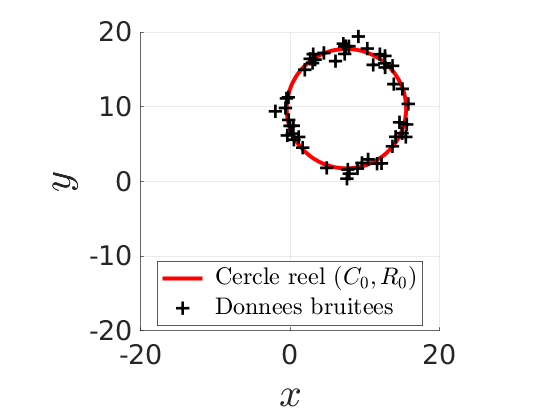

In [2]:
run("donnees.m")

## Exercice 1 : estimation de la position du centre

Dans un premier temps, le rayon $R_{0}=8$ du cercle est supposé connu. Seule la position $C_{0}$ de son centre est inconnue, donc $\theta=\left(C, R_{0}\right)$. Comme un produit est plus difficile à maximiser qu'une somme, et que la fonction logarithme est strictement croissante, il est préférable de maximiser la log-vraisemblance $\ln L_{\left(C, R_{0}\right)}\left(P_{1}, \ldots, P_{n}\right):$
$$
C^{*}=\underset{C \in \mathbb{R}^{2}}{\arg \max }\left\{\ln \prod_{i=1}^{n} f_{\left(C, R_{0}\right)}\left(P_{i}\right)\right\}=\underset{C \in \mathbb{R}^{2}}{\arg \min } \sum_{i=1}^{n}\left\{\left[d\left(P_{i}, C\right)-R_{0}\right]^{2}\right\}
$$
Écrivez la fonction `estimation_1`, appelée par le script `exercice_1`, censée résoudre le problème (3) par tirages aléatoires selon deux lois uniformes (fonction rand de Matlab), si possible sans boucle for. Faites varier le nombre $n$ de points, l'écart-type $\sigma$ de la distance des $P_{i}$ au cercle, le nombre $n_{\text {tests }}$ de positions de $C$.

_1. Calculer le centred de gravité $G = [\overline{x}; \overline{y}]$_

_2. Calculer le rayon moyen $\overline{R} = \overline{d(P_i, G)}$_

_3. Tirer aléatoirement et uniformement des centres candidts $C_k$._
4. Pour tous les $C_k$, calculer $\epsilon(P_i)_k = \sum_{i}d(P_i, C_k) - \overline{R}$.
5. Trouver l'indice $k^*$ du minimum des $\epsilon(P_i)_k$.
6. Retoyrner $C_k$.

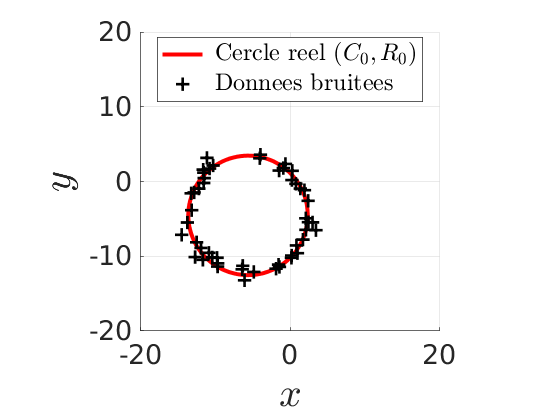

In [51]:
donnees;

% Le rayon R_0 est connu :
R_0 = 8;

% Tirage aleatoire uniforme de positions du centre C : 
nb_tests = 1000;
C_tests = (taille-R_0)*(2*rand(nb_tests,2)-1);

In [52]:
C_tests;

In [117]:
% Pour toius les C_k, calculer epsilon(Pi)_k.
dx = x_donnees_bruitees - C_tests(:, 1);
dy = y_donnees_bruitees - C_tests(:, 2);
d = sqrt(dx.^2 + dy.^2);
epsilon = sum(d - R_0, 2);
% Trouver l'indice k* du minimum des epsilon(Pi)_k
[epsilon_star, k_star] = min(epsilon);
% Retourner C_k
Ck = C_tests(k_star, :)


Ck =

   11.0210    4.8198



In [137]:
%%file estimation_1.m

function C_estime = estimation_1(x_donnees_bruitees, y_donnees_bruitees, C_tests, R_0)
    % Estimation Naive de Monte-Carlo
    % Pour toius les C_k, calculer epsilon(Pi)_k.
    % Pour toius les C_k, calculer epsilon(Pi)_k.
    dx = x_donnees_bruitees - C_tests(:, 1);
    dy = y_donnees_bruitees - C_tests(:, 2);
    d = sqrt(dx.^2 + dy.^2);
    epsilon = sum(abs(d - R_0), 2);
    % Trouver l'indice k* du minimum des epsilon(Pi)_k
    [epsilon_star, k_star] = min(epsilon);
    % Retourner C_k
    Ck = C_tests(k_star, :);
    C_estime = Ck;
end

Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp1/estimation_1.m'.


In [138]:
%%file exercice_1.m

donnees;

% Le rayon R_0 est connu :
R_0 = 8;

% Tirage aleatoire uniforme de positions du centre C : 
nb_tests = 1000;
C_tests = (taille-R_0)*(2*rand(nb_tests,2)-1);
C_estime = estimation_1(x_donnees_bruitees, y_donnees_bruitees,C_tests,R_0);

% Affichage du cercle estime :
x_cercle_estime = C_estime(1) + R_0*cos(theta_cercle);
y_cercle_estime = C_estime(2) + R_0*sin(theta_cercle);
plot(x_cercle_estime([1:end 1]),y_cercle_estime([1:end 1]),'b','LineWidth',3);
lg = legend('~Cercle reel $(C_0,R_0)$', ...
		'~Donnees bruitees', ...
		'~Cercle estime $(C^*,R_0)$', ...
		'Location','Best');
set(lg,'Interpreter','Latex');


Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp1/exercice_1.m'.


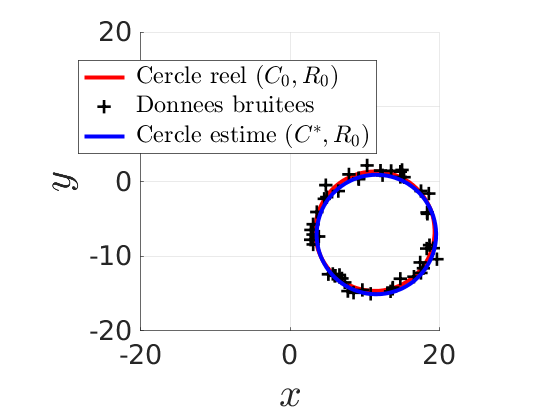

In [141]:
run("exercice_1.m")

## Exercice 2 : estimation simultanée du centre et du rayon

On suppose maintenant ni $C_{0}$ ni $R_{0}$ ne sont connus. L'estimation du rayon est un peu plus délicate, car le facteur de normalisation $K$ de la loi $(2)$ dépend de $R_{0}$. Au lieu de $(3)$, on doit maintenant résoudre :
$$
\left(C^{*}, R^{*}\right)=\underset{(C, R) \in \mathbb{R}^{2} \times \mathbb{R}^{+}}{\arg \max }\left\{\ln \prod_{i=1}^{n} f_{(C, R)}\left(P_{i}\right)\right\}=\underset{(C, R) \in \mathbb{R}^{2} \times \mathbb{R}^{+}}{\arg \min } \sum_{i=1}^{n}\left\{-\ln K+\frac{\left[d\left(P_{i}, C\right)-R\right]^{2}}{2 \sigma^{2}}\right\}
$$
Pour connaitre la dépendance de $K$ en $R_{0}$, écrivons la normalisation de la loi (2) en coordonnées polaires :
$$
K \int_{\theta=0}^{2 \pi} d \theta \int_{\rho=0}^{+\infty} \exp \left\{-\frac{\left(\rho-R_{0}\right)^{2}}{2 \sigma^{2}}\right\} \rho d \rho=1
$$
qui devient, avec le changement de variable $\tau=\rho-R_{0}$ :
$$
\int_{\tau=-R_{0}}^{+\infty} \exp \left\{-\frac{\tau^{2}}{2 \sigma^{2}}\right\} \tau d \tau+R_{0} \int_{\tau=-R_{0}}^{+\infty} \exp \left\{-\frac{\tau^{2}}{2 \sigma^{2}}\right\} d \tau=\frac{1}{K 2 \pi}
$$
Dans (6), la première intégrale est facile à calculer, mais il n'existe pas d'expression analytique pour la seconde. En supposant $R_{0} \gg \sigma,$ on peut néanmoins écrire l'approximation suivante (la borne $- \infty$ est inexacte) :
$$
\sigma^{2} \exp \left\{-\frac{R_{0}^{2}}{2 \sigma^{2}}\right\}+R_{0} \int_{\tau=-\infty}^{+\infty} \exp \left\{-\frac{\tau^{2}}{2 \sigma^{2}}\right\} d \tau \approx \frac{1}{K 2 \pi}
$$
Dans cette expression, on reconnait l'intégrale de Gauss, donc :
$$
\sigma^{2} \exp \left\{-\frac{R_{0}^{2}}{2 \sigma^{2}}\right\}+R_{0} \sigma \sqrt{2 \pi} \approx \frac{1}{K 2 \pi}
$$
L'hypothèse $R_{0} \gg \sigma$ permet de négliger le premier terme du premier membre de $(8),$ ce qui donne enfin :
$$
K \approx \frac{1}{R_{0} \sigma(2 \pi)^{3 / 2}}
$$
La résolution du problème (4) revient donc à l'estimation approchée suivante :
$$
\left(x_{C}^{*}, y_{C}^{*}, R^{*}\right) \approx \underset{\left(x_{C}, y_{C}, R\right) \in \mathbb{R}^{2} \times \mathbb{R}^{+}}{\arg \min } \sum_{i=1}^{n}\left\{\ln R+\frac{\left[d\left(P_{i}, C\right)-R\right]^{2}}{2 \sigma^{2}}\right\}
$$
En utilisant à nouveau l'hypothèse $R_{0} \gg \sigma,$ on voit que le premier terme de l'argument peut être négligé :
$$
\left(x_{C}^{*}, y_{C}^{*}, R^{*}\right) \approx \underset{\left(x_{C}, y_{C}, R\right) \in \mathbb{R}^{2} \times \mathbb{R}^{+}}{\arg \min } \sum_{i=1}^{n}\left\{\left[d\left(P_{i}, C\right)-R\right]^{2}\right\}
$$


Remarquez néanmoins qu'il aurait été impropre de déduire $(11)$ de $(3)$, puisque $(11)$ est une approximation. Dupliquez `exercice_1` et `estimation_1`, sous les noms `exercice_2` et `estimation_2`, puis modifiez ces copies de manière à résoudre le problème $(11)$ par tirages aléatoires, avec par exemple $0 \leq R \leq 2 R_{0}$. Effectuez le même nombre $n_{\text {tests }}$ de tirages pour $C$ et pour $R,$ puis testez chaque couple $\left(C_{i}, R_{i}\right), i \in\left\{1, \ldots, n_{\text {tests }}\right\}$

1. Calculer le centred de gravité $G = [\overline{x}; \overline{y}]$
2. Calculer le rayon moyen $\overline{R} = \overline{d(P_i, G)}$
3. Tirer aléatoirement et uniformement des centres candidts $C_k$.
4. Pour tous les $C_k$, calculer $\epsilon(P_i)_k = \sum_{i}d(P_i, C_k) - \overline{R}$.
5. Trouver l'indice $k^*$ du minimum des $\epsilon(P_i)_k$.
6. Retoyrner $C_k$.

In [192]:
%%file exercice_2.m

donnees;

% Le rayon R_0 est inconnu :
R_0 = 8;

% Tirage aleatoire uniforme de positions du centre C : 
nb_tests = 100000;
R_tests = 2*R_0*rand(nb_tests, 1);
C_tests = (taille-R_0)*(2*rand(nb_tests,2)-1);
[C_estime, R_estime] = estimation_2(x_donnees_bruitees,y_donnees_bruitees,C_tests,R_tests);

% Affichage du cercle estime :
x_cercle_estime = C_estime(1) + R_estime*cos(theta_cercle);
y_cercle_estime = C_estime(2) + R_estime*sin(theta_cercle);
plot(x_cercle_estime([1:end 1]),y_cercle_estime([1:end 1]),'b','LineWidth',3);
lg = legend('~Cercle reel $(C_0,R_0)$', ...
		'~Donnees bruitees', ...
		'~Cercle estime $(C^*,R^*)$', ...
		'Location','Best');
set(lg,'Interpreter','Latex');


Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp1/exercice_2.m'.


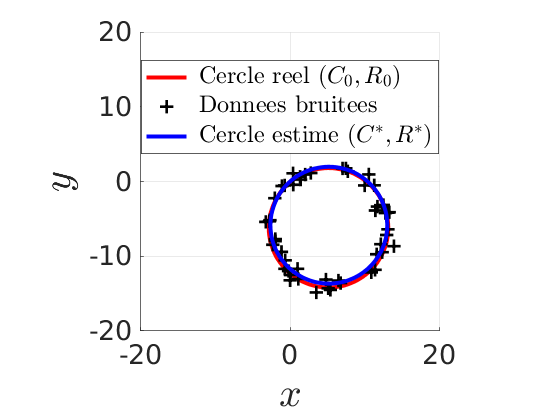

In [196]:
run("exercice_2.m")

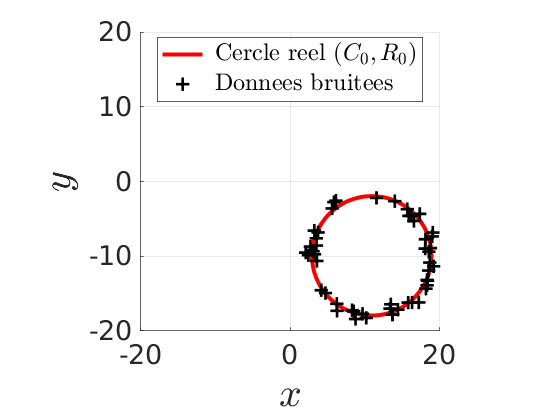

In [183]:
donnees;
R_0 = 8;
nb_tests = 1000000;
R_tests = 2*R_0*rand(nb_tests, 1);
C_tests = (taille-R_0)*(2*rand(nb_tests,2)-1);

In [197]:
% G centre de gravité des pts
G = [mean(x_donnees_bruitees), mean(y_donnees_bruitees)];
% Distance G aux pts
dG_xy = sqrt((x_donnees_bruitees - G(1)).^2 + (y_donnees_bruitees - G(2)).^2);
% R moyen
R = mean(dG_xy);
% Pour toius les C_k, calculer epsilon(Pi)_k.
dx = x_donnees_bruitees - C_tests(:, 1);
dy = y_donnees_bruitees - C_tests(:, 2);
d = sqrt(dx.^2 + dy.^2);
epsilon = sum(abs(d - R_tests), 2);
% Trouver l'indice k* du minimum des epsilon(Pi)_k
[epsilon_star, k_star] = min(epsilon);
% Retourner C_k
Ck = C_tests(k_star, :);
Rk = R_tests(k_star, :);
C_estime = Ck;
R_estime = Rk;

In [201]:
%%file estimation_2.m
function [C_estime, R_estime] = estimation_2(x_donnees_bruitees,y_donnees_bruitees,C_tests,R_tests)
    % G centre de gravité des pts
    %G = [mean(x_donnees_bruitees), mean(y_donnees_bruitees)];
    % Distance G aux pts
    %dG_xy = sqrt((x_donnees_bruitees - G(1)).^2 + (y_donnees_bruitees - G(2)).^2);
    % R moyen
    %R = mean(dG_xy);
    % Pour toius les C_k, calculer epsilon(Pi)_k.
    dx = x_donnees_bruitees - C_tests(:, 1);
    dy = y_donnees_bruitees - C_tests(:, 2);
    d = sqrt(dx.^2 + dy.^2);
    epsilon = sum(abs(d - R_tests), 2);
    % Trouver l'indice k* du minimum des epsilon(Pi)_k
    [epsilon_star, k_star] = min(epsilon);
    % Retourner C_k
    Ck = C_tests(k_star, :);
    Rk = R_tests(k_star, :);
    C_estime = Ck;
    R_estime = Rk;
end

Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp1/estimation_2.m'.


## Exercice 3 : données partiellement occultées
Faites une copie du script exercice_2, de nom exercice_3, où vous remplacerez l'appel donnees par donnees_occultees. Pour écrire donnees_occultees, faites une copie de donnees, que vous modifierez de manière à tirer aléatoirement deux angles $\theta_{1}$ et $\theta_{2}$ dans $\left[0,2 \pi\left[,\right.\right.$ puis à conserver seulement les points $P_{i}$ d'angles \right. polaires $\theta_{i} \in\left[\theta_{1}, \theta_{2}\right]$ si $\theta_{1} \leq \theta_{2},$ et les points $P_{i}$ d'angles polaires $\theta_{i} \in\left[0, \theta_{2}\right] \cup\left[\theta_{1}, 2 \pi\left[,\right.\right.$ dans le cas où $\theta_{1} $>$\theta_{2}.$

In [267]:
%%file donnees_occultees.m

clear;
close all;

taille_ecran = get(0,'ScreenSize');
L = taille_ecran(3);
H = taille_ecran(4);

% Fenetre d'affichage :
figure('Name','Donnees situees au voisinage d''un cercle', ...
       'Position',[0.2*L,0.05*H,0.6*L,0.7*H]);
axis equal;
hold on;
set(gca,'FontSize',20);
hx = xlabel('$x$','FontSize',30);
set(hx,'Interpreter','Latex');
hy = ylabel('$y$','FontSize',30);
set(hy,'Interpreter','Latex');

% Bornes d'affichage des donnees centrees en (0,0) :
taille = 20;
bornes = [-taille taille, -taille taille];

% Creation du cercle reel et des donnees bruitees :
n = 50;
sigma = 0.5;
[x_cercle_reel,y_cercle_reel,theta_cercle, ...
	x_donnees_bruitees,y_donnees_bruitees,theta_donnees_bruitees] ...
		= creation_cercle_reel_et_donnees_bruitees(taille,n,sigma);

theta1 = 2*pi*rand();
theta2 = 2*pi*rand();
if theta1 < theta2
    theta_donnees_bruiteesEtOccultees = theta_donnees_bruitees<theta2 & theta_donnees_bruitees>theta1;
else
    theta_donnees_bruiteesEtOccultees = theta_donnees_bruitees<theta1 & theta_donnees_bruitees>theta2;
end
x_donnees_bruitees_bruiteesEtOccultees = x_donnees_bruitees(theta_donnees_bruiteesEtOccultees);
y_donnees_bruitees_bruiteesEtOccultees = y_donnees_bruitees(theta_donnees_bruiteesEtOccultees);

% Affichage du cercle reel :
plot(x_cercle_reel([1:end 1]),y_cercle_reel([1:end 1]),'r','LineWidth',3);

% Affichage des donnees bruitees :

plot(x_donnees_bruitees_bruiteesEtOccultees, y_donnees_bruitees_bruiteesEtOccultees,'k+','MarkerSize',10,'LineWidth',2);
axis(bornes);
lg = legend('~Cercle reel $(C_0,R_0)$', ...
		'~Donnees bruitees', ...
		'Location','Best');
set(lg,'Interpreter','Latex');
grid on;

Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp1/donnees_occultees.m'.


In [269]:
%%file exercice_3.m

donnees_occultees;

% Le rayon R_0 est inconnu :
R_0 = 8;

% Tirage aleatoire uniforme de positions du centre C : 
nb_tests = 100000;
R_tests = 2*R_0*rand(nb_tests, 1);
C_tests = (taille-R_0)*(2*rand(nb_tests,2)-1);
[C_estime, R_estime] = estimation_2(x_donnees_bruitees_bruiteesEtOccultees,y_donnees_bruitees_bruiteesEtOccultees,C_tests,R_tests);

% Affichage du cercle estime :
x_cercle_estime = C_estime(1) + R_estime*cos(theta_cercle);
y_cercle_estime = C_estime(2) + R_estime*sin(theta_cercle);
plot(x_cercle_estime([1:end 1]),y_cercle_estime([1:end 1]),'b','LineWidth',3);
lg = legend('~Cercle reel $(C_0,R_0)$', ...
		'~Donnees bruitees', ...
		'~Cercle estime $(C^*,R^*)$', ...
		'Location','Best');
set(lg,'Interpreter','Latex');


Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp1/exercice_3.m'.


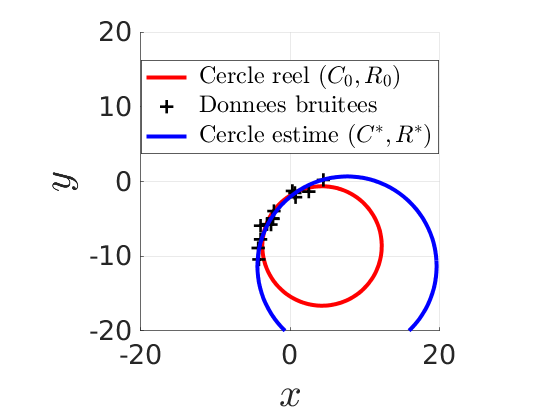

In [274]:
run("exercice_3.m")

## Exercice 4 : modification des tirages aléatoires (facultatif)

Plutôt que des lois uniformes, il semble plus pertinent d'utiliser des lois normales pour les tirages aléatoires. Faites une copie du script exercice_2, de nom exercice_4, où vous appellerez le script exercice_2 au lieu du script donnees, et où vous traduirez cette idée à l'aide de la fonction randn de Matlab (le n final indique qu'il s'agit d'une loi normale). Vous devriez constater une amélioration dans les estimations.

In [211]:
%%file exercice_4.m

donnees;

% Le rayon R_0 est inconnu :
R_0 = 8;

% Tirage aleatoire uniforme de positions du centre C : 
nb_tests = 100000;
R_tests = 2*R_0*randn(nb_tests, 1);
C_tests = (taille-R_0)*(2*randn(nb_tests,2)-1);
[C_estime, R_estime] = estimation_2(x_donnees_bruitees,y_donnees_bruitees,C_tests,R_tests);

% Affichage du cercle estime :
x_cercle_estime = C_estime(1) + R_estime*cos(theta_cercle);
y_cercle_estime = C_estime(2) + R_estime*sin(theta_cercle);
plot(x_cercle_estime([1:end 1]),y_cercle_estime([1:end 1]),'b','LineWidth',3);
lg = legend('~Cercle reel $(C_0,R_0)$', ...
		'~Donnees bruitees', ...
		'~Cercle estime $(C^*,R^*)$', ...
		'Location','Best');
set(lg,'Interpreter','Latex');


Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp1/exercice_4.m'.


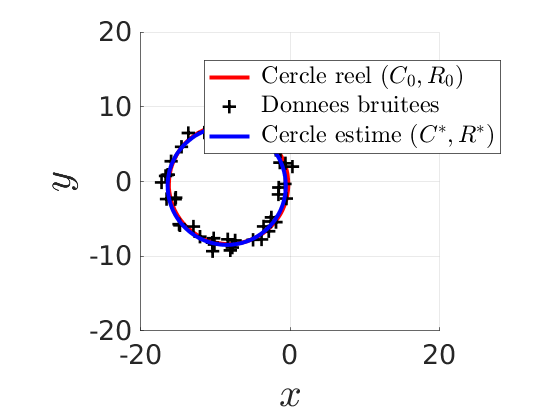

In [213]:
run("exercice_4.m")